# MCMAC results analysis

・'age' is absolute time

・'sep.kpc' is projected distance between two clusters

・'merger' shows the clusters is pre-merger or not

・'TSC_Catalog' shows Time Since Collision from Galaxy Cluster Merger Catalog. 

 We can calculate 
 
 TTC by "(1st apocentric passage's absolute time) - (TSC at 1st apocentric passage) - (dataframe's age) "
 
and 

TSC "(dataframe's age) - { (1st apocentric passage's absolute time) - (TSC at 1st apocentric passage)}".
 
 For simple dataframe, we replaced TTC to TSC by putting minus symbol
 
・'TSC0' shows Time Since Collision from MCMAC-pre-merger and MCMAC-post-merger

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

## Mass ratio 1:1 b=0kpc

In [80]:
filename = '../output0711/zh_1to1_b0_z_MCMAC.txt'

df = pd.read_csv(filename, sep='\t')
df_selected = df[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected.loc[df_selected['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

display(df_selected)

,age,sep.kpc,merger,TSC_Catalog,TSC0,TSC0.lower,TSC0.upper
0,0.00,3098.633732,pre,-1.320000e+00,-2.536071,-1.219913,-6.969493
1,0.40,2495.030909,pre,-9.200000e-01,-1.970600,-1.076184,-5.231445
2,0.60,2116.826388,pre,-7.200000e-01,-1.620067,-0.933079,-4.333053
3,0.80,1664.837693,pre,-5.200000e-01,-1.250352,-0.752724,-3.252235
4,1.00,1180.589026,pre,-3.200000e-01,-0.930279,-0.546330,-2.086328
5,1.20,525.597223,pre,-1.200000e-01,-0.513372,-0.264366,-1.084441
6,1.22,459.726888,pre,-1.000000e-01,-0.466308,-0.234220,-0.973504
7,1.24,387.092082,pre,-8.000000e-02,-0.409629,-0.201523,-0.852116
8,1.26,297.627006,pre,-6.000000e-02,-0.337334,-0.158622,-0.738586
9,1.28,208.934429,pre,-4.000000e-02,-0.259906,-0.114171,-0.621751


/tmp/ipykernel_3706298/2178996770.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100


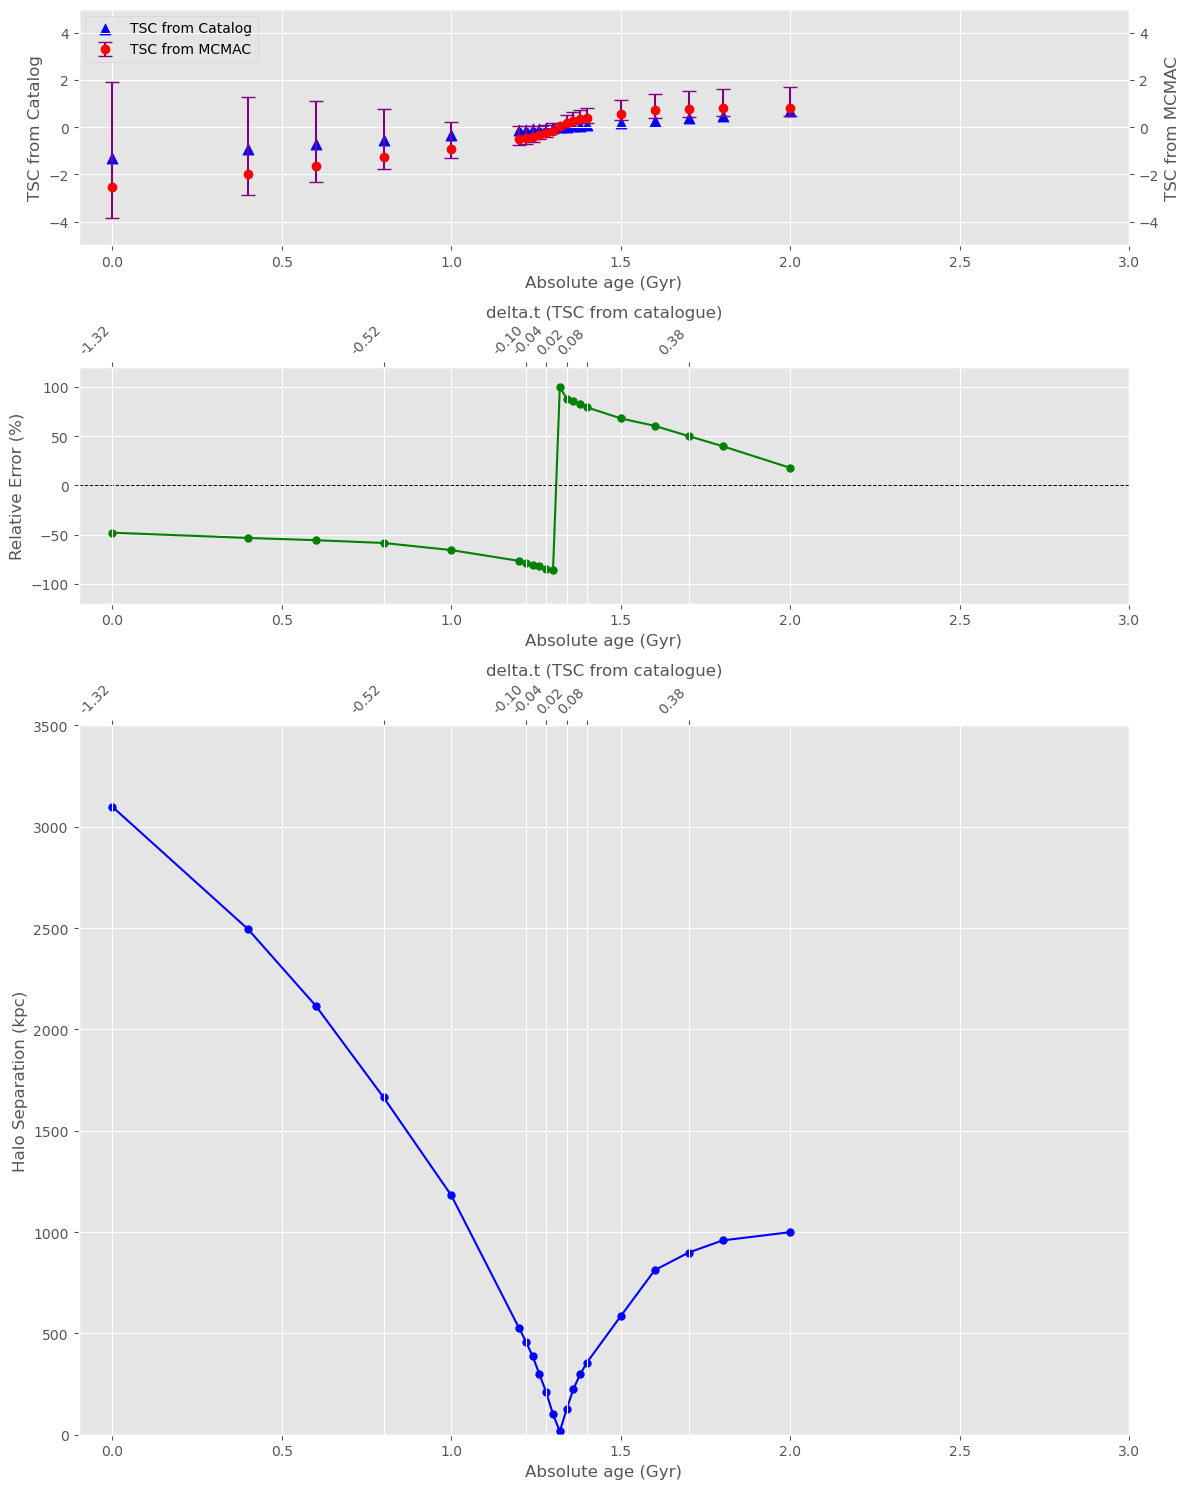

In [81]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# 相対誤差の計算
df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 15))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 3])

# 上部プロット
ax1 = fig.add_subplot(gs[0])
# 青い点を三角形に変更
line1 = ax1.scatter(df_selected['age'], df_selected['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')  # markersize=8 equivalent to s=64 in scatter
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(-0.1, 3)
ax1.set_ylim(-5, 5)

# 第二のy軸としてTSC from MCMACを追加
ax2 = ax1.twinx()
# 赤いデータセットのシンボルを丸ではなく三角形に変更
line2 = ax2.errorbar(df_selected['age'], df_selected['TSC0'], yerr=[np.abs(df_selected['TSC0'] - df_selected['TSC0.lower']), np.abs(df_selected['TSC0.upper'] - df_selected['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

# 凡例を追加
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[1])
ax3.plot(df_selected['age'], df_selected['Relative Error'], 'g-', label='Relative Error', marker='o', markersize=5)
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Relative Error (%)')
ax3.set_xlim(-0.1, 3)
ax3.set_ylim(-120, 120)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected['age'][::3])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::3]
ax6.set_xticklabels(relative_time_labels, rotation=45, ha='right')
ax6.set_xlabel('delta.t (TSC from catalogue)')

# 下部プロット
ax4 = fig.add_subplot(gs[2])
ax4.plot(df_selected['age'], df_selected['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(-0.1, 3)
ax4.set_ylim(0, 3500)

# 第二のx軸としてRelative timeを追加
ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected['age'][::3])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::3]
ax5.set_xticklabels(relative_time_labels, rotation=45, ha='right')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()


## Mass ratio 1:1 b=500kpc

In [82]:
import pandas as pd

filename = '../output0711/zh_1to1_b0.5_z_MCMAC.txt'

df = pd.read_csv(filename, sep='\t')
df_selected = df[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected.loc[df_selected['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

display(df_selected.head())

,age,sep.kpc,merger,TSC_Catalog,TSC0,TSC0.lower,TSC0.upper
0,0.0,3102.464652,pre,-1.32,-2.540895,-1.221110,-6.979742
1,0.4,2479.069187,pre,-0.92,-1.954831,-1.064591,-5.189434
2,0.6,2159.484900,pre,-0.72,-1.648094,-0.949917,-4.428728
3,0.8,1711.813002,pre,-0.52,-1.276735,-0.766423,-3.346255
4,1.0,1177.594331,pre,-0.32,-0.922627,-0.543023,-2.108130


/tmp/ipykernel_3706298/2178996770.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100


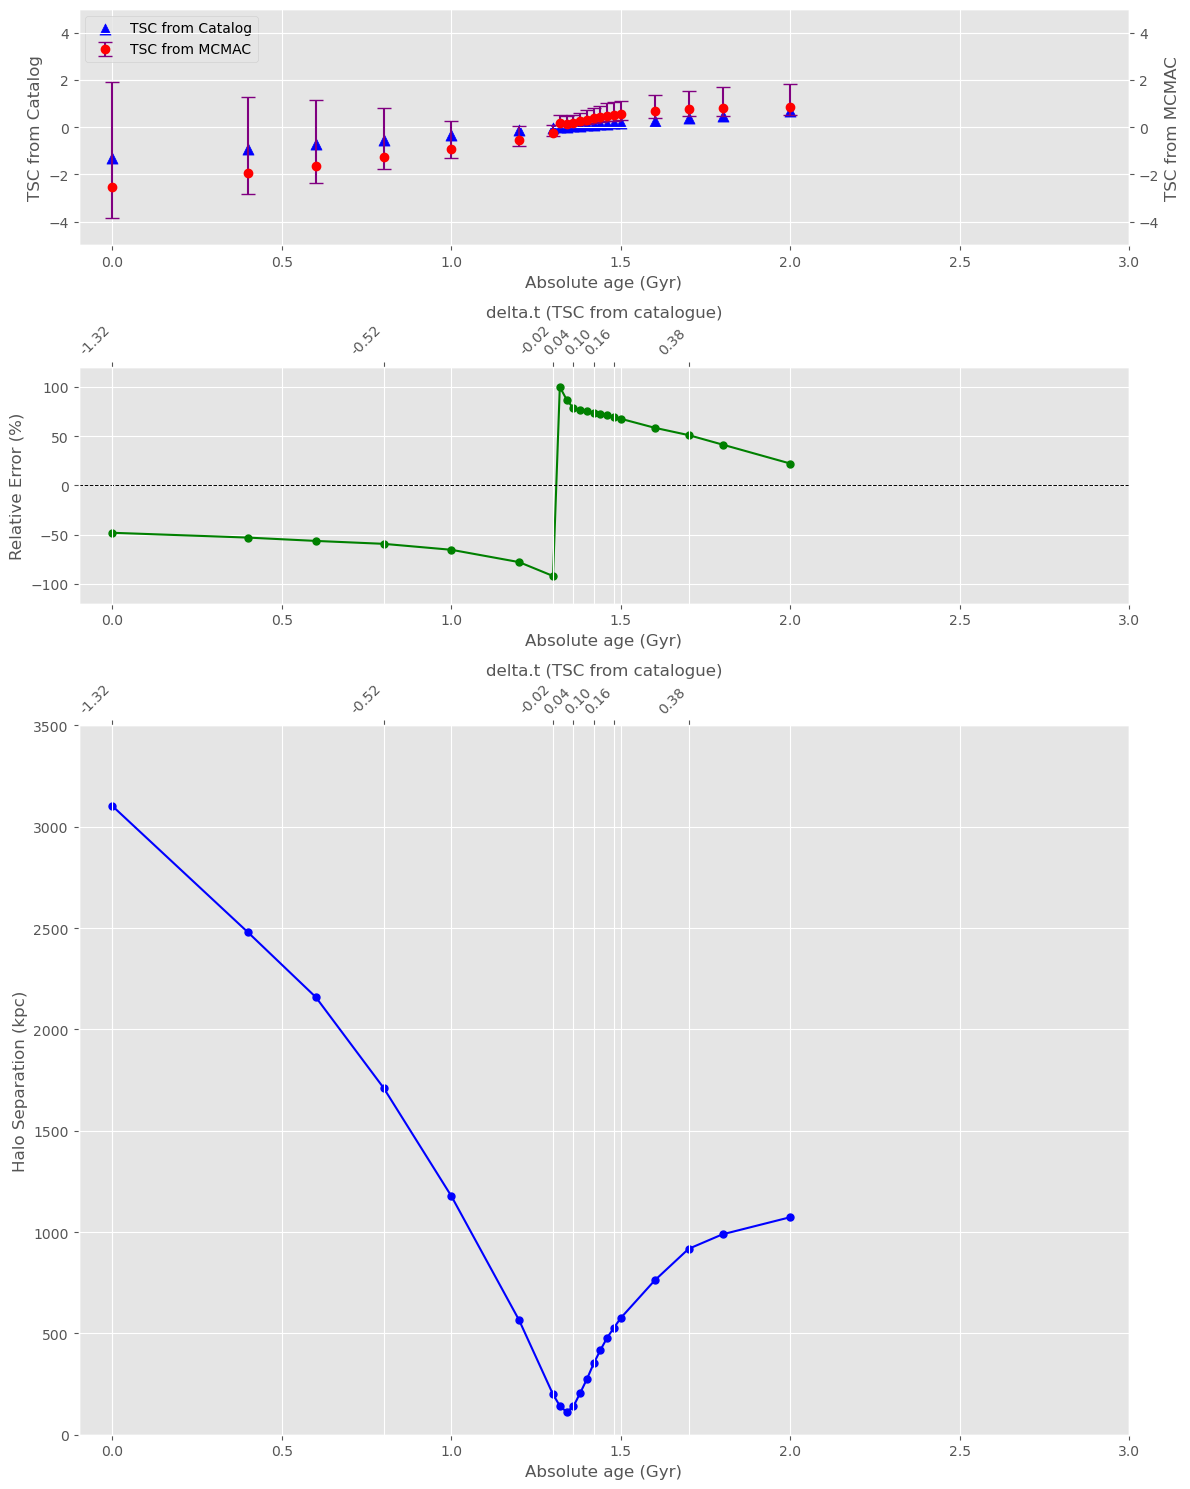

In [83]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# 相対誤差の計算
df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 15))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 3])

# 上部プロット
ax1 = fig.add_subplot(gs[0])
# 青い点を三角形に変更
line1 = ax1.scatter(df_selected['age'], df_selected['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')  # markersize=8 equivalent to s=64 in scatter
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(-0.1, 3)
ax1.set_ylim(-5, 5)

# 第二のy軸としてTSC from MCMACを追加
ax2 = ax1.twinx()
# 赤いデータセットのシンボルを丸ではなく三角形に変更
line2 = ax2.errorbar(df_selected['age'], df_selected['TSC0'], yerr=[np.abs(df_selected['TSC0'] - df_selected['TSC0.lower']), np.abs(df_selected['TSC0.upper'] - df_selected['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

# 凡例を追加
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[1])
ax3.plot(df_selected['age'], df_selected['Relative Error'], 'g-', label='Relative Error', marker='o', markersize=5)
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Relative Error (%)')
ax3.set_xlim(-0.1, 3)
ax3.set_ylim(-120, 120)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected['age'][::3])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::3]
ax6.set_xticklabels(relative_time_labels, rotation=45, ha='right')
ax6.set_xlabel('delta.t (TSC from catalogue)')

# 下部プロット
ax4 = fig.add_subplot(gs[2])
ax4.plot(df_selected['age'], df_selected['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(-0.1, 3)
ax4.set_ylim(0, 3500)

# 第二のx軸としてRelative timeを追加
ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected['age'][::3])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::3]
ax5.set_xticklabels(relative_time_labels, rotation=45, ha='right')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()


## Mass ratio 1:1 b=1000kpc

In [84]:
import pandas as pd

filename = '../output0711/zh_1to1_b1_z_MCMAC.txt'

df = pd.read_csv(filename, sep='\t')
df_selected = df[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected.loc[df_selected['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

display(df_selected.head())

,age,sep.kpc,merger,TSC_Catalog,TSC0,TSC0.lower,TSC0.upper
0,0.0,3100.661059,pre,-1.4,-2.533603,-1.219620,-6.974917
1,0.4,2531.730595,pre,-1.0,-1.997786,-1.093847,-5.328308
2,0.6,2146.665736,pre,-0.8,-1.640565,-0.942617,-4.393402
3,0.8,1767.195937,pre,-0.6,-1.316395,-0.780871,-3.472273
4,1.0,1305.748597,pre,-0.4,-1.008170,-0.602076,-2.443591


/tmp/ipykernel_3706298/2178996770.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100


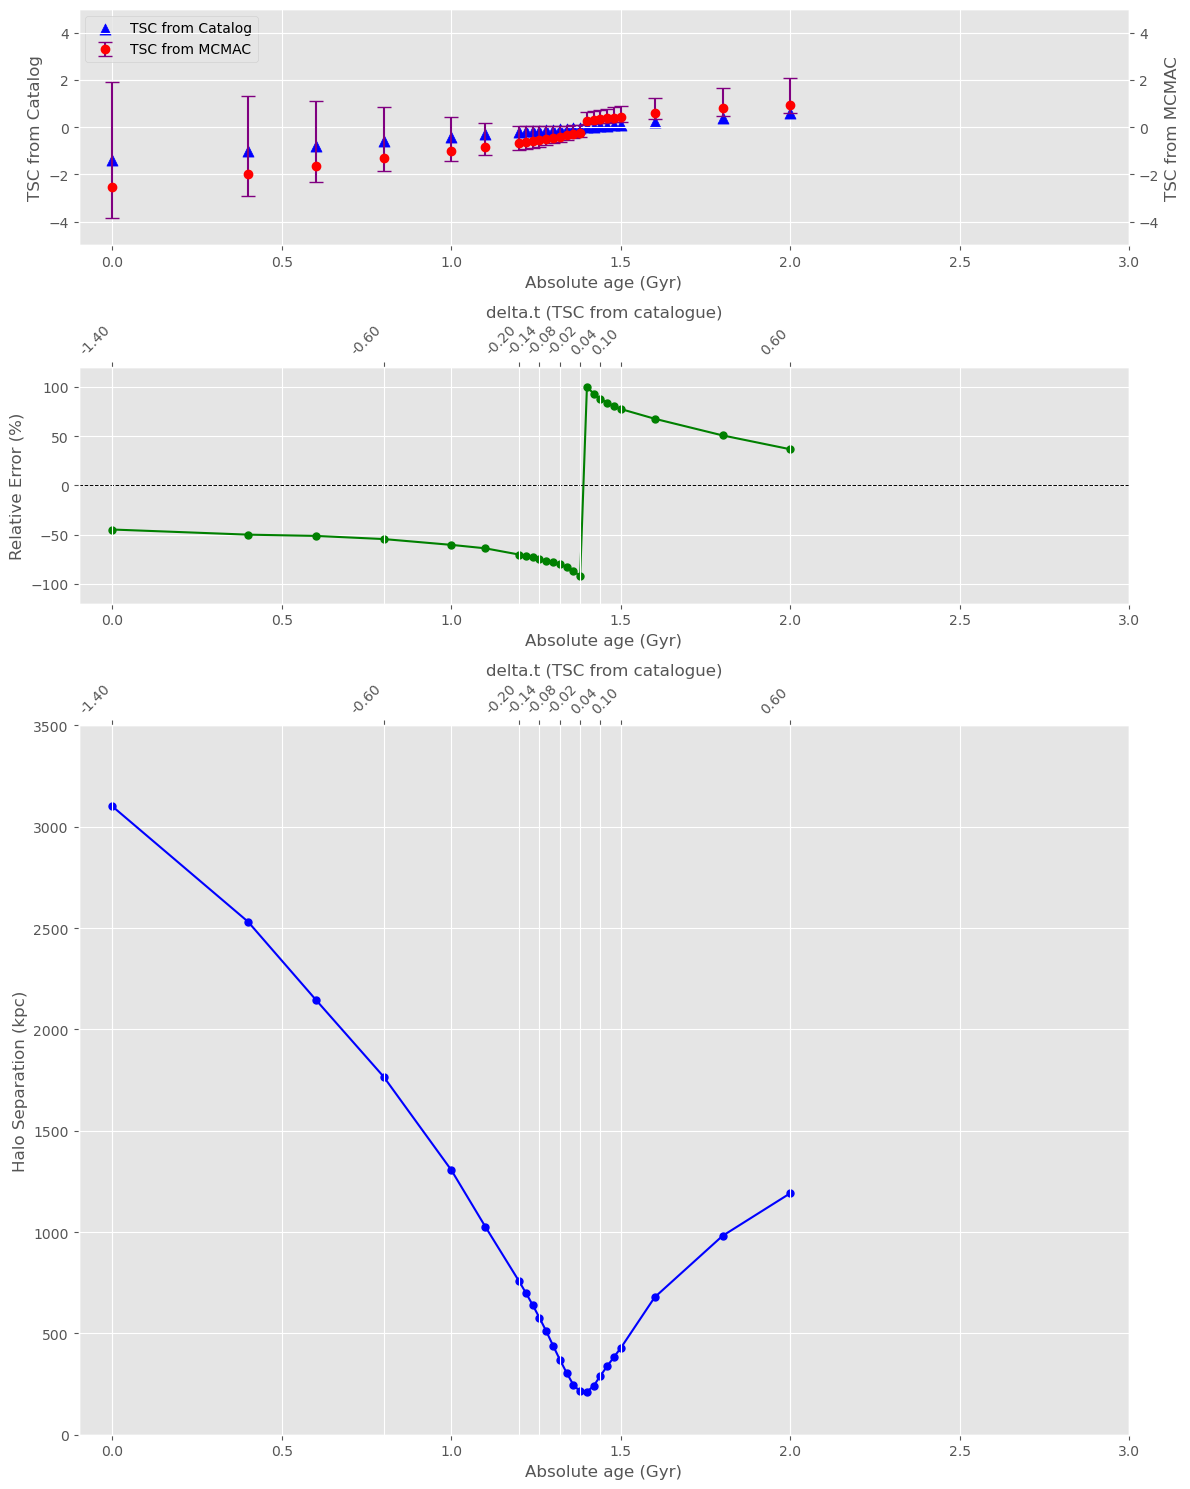

In [85]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# 相対誤差の計算
df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 15))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 3])

# 上部プロット
ax1 = fig.add_subplot(gs[0])
# 青い点を三角形に変更
line1 = ax1.scatter(df_selected['age'], df_selected['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')  # markersize=8 equivalent to s=64 in scatter
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(-0.1, 3)
ax1.set_ylim(-5, 5)

# 第二のy軸としてTSC from MCMACを追加
ax2 = ax1.twinx()
# 赤いデータセットのシンボルを丸ではなく三角形に変更
line2 = ax2.errorbar(df_selected['age'], df_selected['TSC0'], yerr=[np.abs(df_selected['TSC0'] - df_selected['TSC0.lower']), np.abs(df_selected['TSC0.upper'] - df_selected['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

# 凡例を追加
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[1])
ax3.plot(df_selected['age'], df_selected['Relative Error'], 'g-', label='Relative Error', marker='o', markersize=5)
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Relative Error (%)')
ax3.set_xlim(-0.1, 3)
ax3.set_ylim(-120, 120)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected['age'][::3])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::3]
ax6.set_xticklabels(relative_time_labels, rotation=45, ha='right')
ax6.set_xlabel('delta.t (TSC from catalogue)')

# 下部プロット
ax4 = fig.add_subplot(gs[2])
ax4.plot(df_selected['age'], df_selected['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(-0.1, 3)
ax4.set_ylim(0, 3500)

# 第二のx軸としてRelative timeを追加
ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected['age'][::3])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::3]
ax5.set_xticklabels(relative_time_labels, rotation=45, ha='right')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()


## Mass ratio 1:3 b=0kpc

In [86]:
import pandas as pd

filename = '../output0711/zh_1to3_b0_z_MCMAC.txt'

df = pd.read_csv(filename, sep='\t')
df_selected = df[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected.loc[df_selected['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

display(df_selected.head())

,age,sep.kpc,merger,TSC_Catalog,TSC0,TSC0.lower,TSC0.upper
0,0.0,2631.245802,pre,-1.2,-2.484536,-0.909769,-7.144320
1,0.4,1977.086050,pre,-0.8,-1.747502,-0.954152,-4.807724
2,0.6,1679.687041,pre,-0.6,-1.458838,-0.824640,-3.778305
3,0.8,1200.403758,pre,-0.4,-1.039496,-0.601983,-2.515534
4,1.0,707.807165,pre,-0.2,-0.665222,-0.372166,-1.367551


/tmp/ipykernel_3706298/2178996770.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100


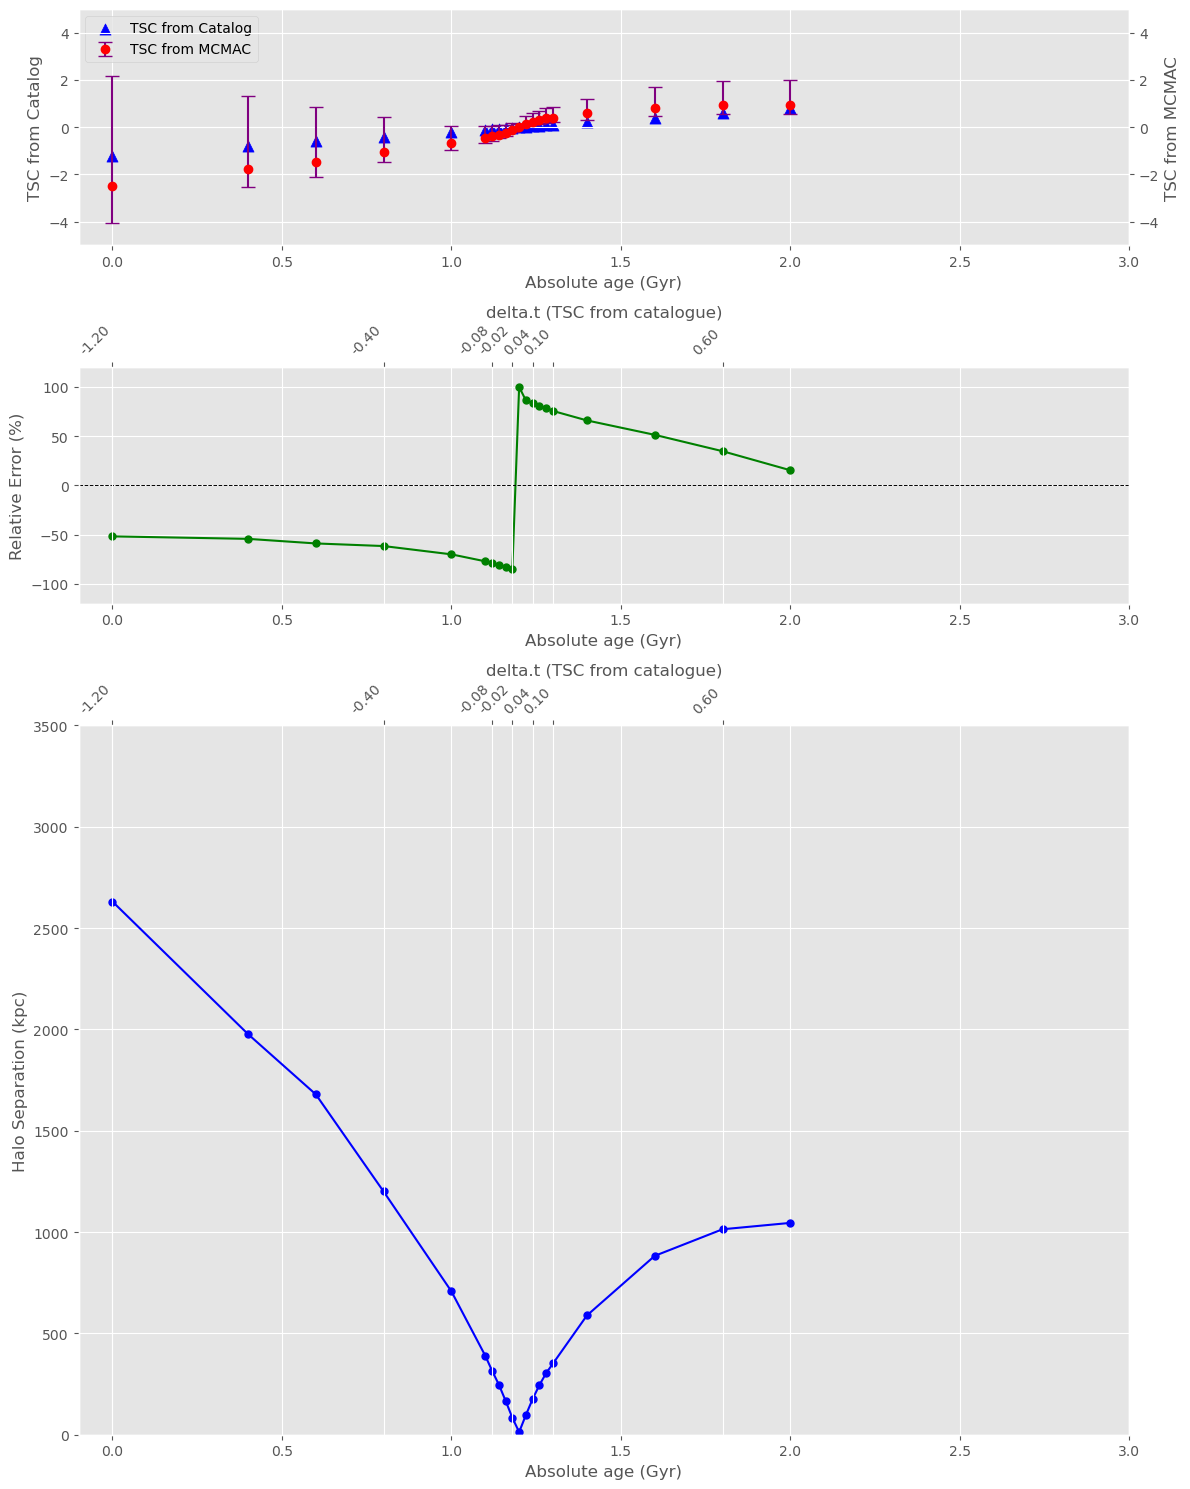

In [87]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# 相対誤差の計算
df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 15))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 3])

# 上部プロット
ax1 = fig.add_subplot(gs[0])
# 青い点を三角形に変更
line1 = ax1.scatter(df_selected['age'], df_selected['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')  # markersize=8 equivalent to s=64 in scatter
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(-0.1, 3)
ax1.set_ylim(-5, 5)

# 第二のy軸としてTSC from MCMACを追加
ax2 = ax1.twinx()
# 赤いデータセットのシンボルを丸ではなく三角形に変更
line2 = ax2.errorbar(df_selected['age'], df_selected['TSC0'], yerr=[np.abs(df_selected['TSC0'] - df_selected['TSC0.lower']), np.abs(df_selected['TSC0.upper'] - df_selected['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

# 凡例を追加
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[1])
ax3.plot(df_selected['age'], df_selected['Relative Error'], 'g-', label='Relative Error', marker='o', markersize=5)
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Relative Error (%)')
ax3.set_xlim(-0.1, 3)
ax3.set_ylim(-120, 120)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected['age'][::3])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::3]
ax6.set_xticklabels(relative_time_labels, rotation=45, ha='right')
ax6.set_xlabel('delta.t (TSC from catalogue)')

# 下部プロット
ax4 = fig.add_subplot(gs[2])
ax4.plot(df_selected['age'], df_selected['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(-0.1, 3)
ax4.set_ylim(0, 3500)

# 第二のx軸としてRelative timeを追加
ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected['age'][::3])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::3]
ax5.set_xticklabels(relative_time_labels, rotation=45, ha='right')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()


## Mass ratio 1:3 b=500kpc

In [88]:
import pandas as pd

filename = '../output0711/zh_1to3_b0.5_z_MCMAC.txt'

df = pd.read_csv(filename, sep='\t')
df_selected = df[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected.loc[df_selected['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

display(df_selected.head())

,age,sep.kpc,merger,TSC_Catalog,TSC0,TSC0.lower,TSC0.upper
0,0.0,2628.682260,pre,-1.2,-2.482432,-0.910084,-7.135433
1,0.4,1981.435862,pre,-0.8,-1.749690,-0.949379,-4.792499
2,0.6,1652.504065,pre,-0.6,-1.431039,-0.811109,-3.569919
3,0.8,1275.877380,pre,-0.4,-1.095052,-0.632217,-2.630671
4,1.0,743.673055,pre,-0.2,-0.696400,-0.389767,-1.451469


/tmp/ipykernel_3706298/2178996770.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100


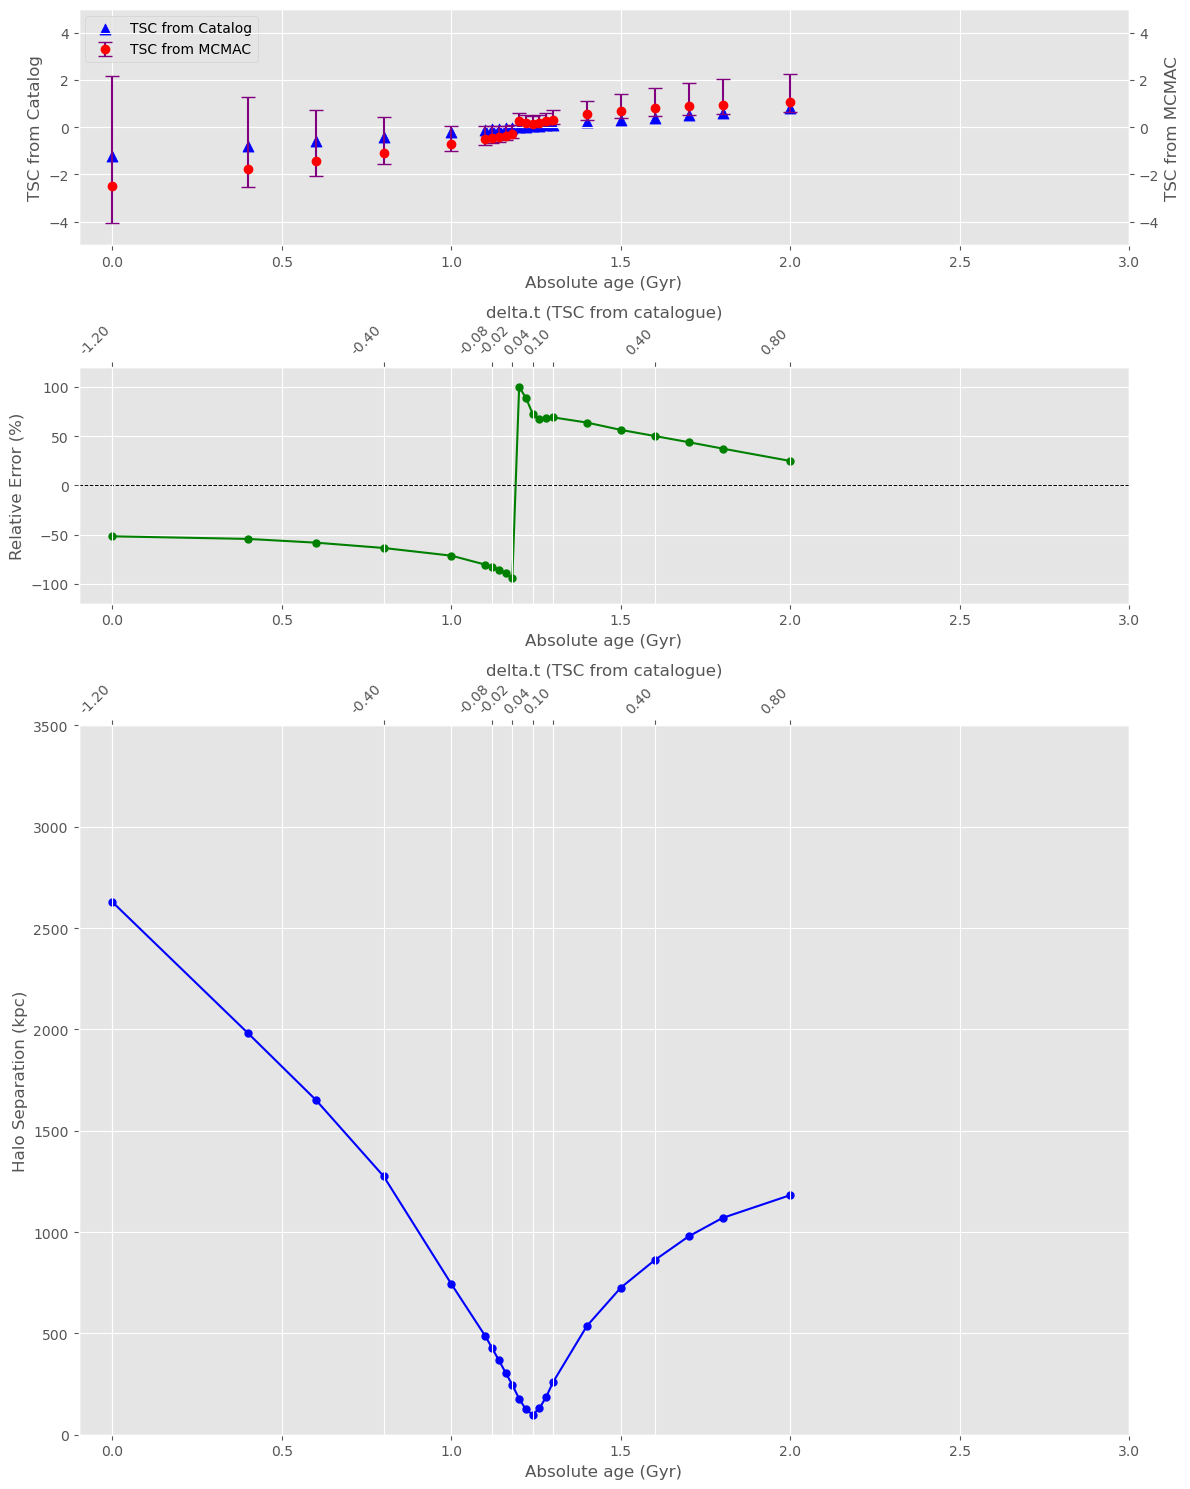

In [89]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# 相対誤差の計算
df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 15))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 3])

# 上部プロット
ax1 = fig.add_subplot(gs[0])
# 青い点を三角形に変更
line1 = ax1.scatter(df_selected['age'], df_selected['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')  # markersize=8 equivalent to s=64 in scatter
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(-0.1, 3)
ax1.set_ylim(-5, 5)

# 第二のy軸としてTSC from MCMACを追加
ax2 = ax1.twinx()
# 赤いデータセットのシンボルを丸ではなく三角形に変更
line2 = ax2.errorbar(df_selected['age'], df_selected['TSC0'], yerr=[np.abs(df_selected['TSC0'] - df_selected['TSC0.lower']), np.abs(df_selected['TSC0.upper'] - df_selected['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

# 凡例を追加
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[1])
ax3.plot(df_selected['age'], df_selected['Relative Error'], 'g-', label='Relative Error', marker='o', markersize=5)
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Relative Error (%)')
ax3.set_xlim(-0.1, 3)
ax3.set_ylim(-120, 120)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected['age'][::3])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::3]
ax6.set_xticklabels(relative_time_labels, rotation=45, ha='right')
ax6.set_xlabel('delta.t (TSC from catalogue)')

# 下部プロット
ax4 = fig.add_subplot(gs[2])
ax4.plot(df_selected['age'], df_selected['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(-0.1, 3)
ax4.set_ylim(0, 3500)

# 第二のx軸としてRelative timeを追加
ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected['age'][::3])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::3]
ax5.set_xticklabels(relative_time_labels, rotation=45, ha='right')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()


## Mass ratio 1:3 b=1000kpc

In [90]:
import pandas as pd

filename = '../output0711/zh_1to3_b1_z_MCMAC.txt'

df = pd.read_csv(filename, sep='\t')
df_selected = df[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected.loc[df_selected['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

display(df_selected.head())

,age,sep.kpc,merger,TSC_Catalog,TSC0,TSC0.lower,TSC0.upper
0,0.0,2624.568250,pre,-1.32,-2.480685,-0.910591,-7.121178
1,0.4,1992.103673,pre,-0.92,-1.752923,-0.954961,-4.802502
2,0.6,1758.527230,pre,-0.72,-1.524923,-0.856610,-4.030077
3,0.8,1351.747408,pre,-0.52,-1.158400,-0.666546,-2.796022
4,1.0,881.778732,pre,-0.32,-0.800907,-0.459065,-1.813451


/tmp/ipykernel_3706298/2178996770.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100


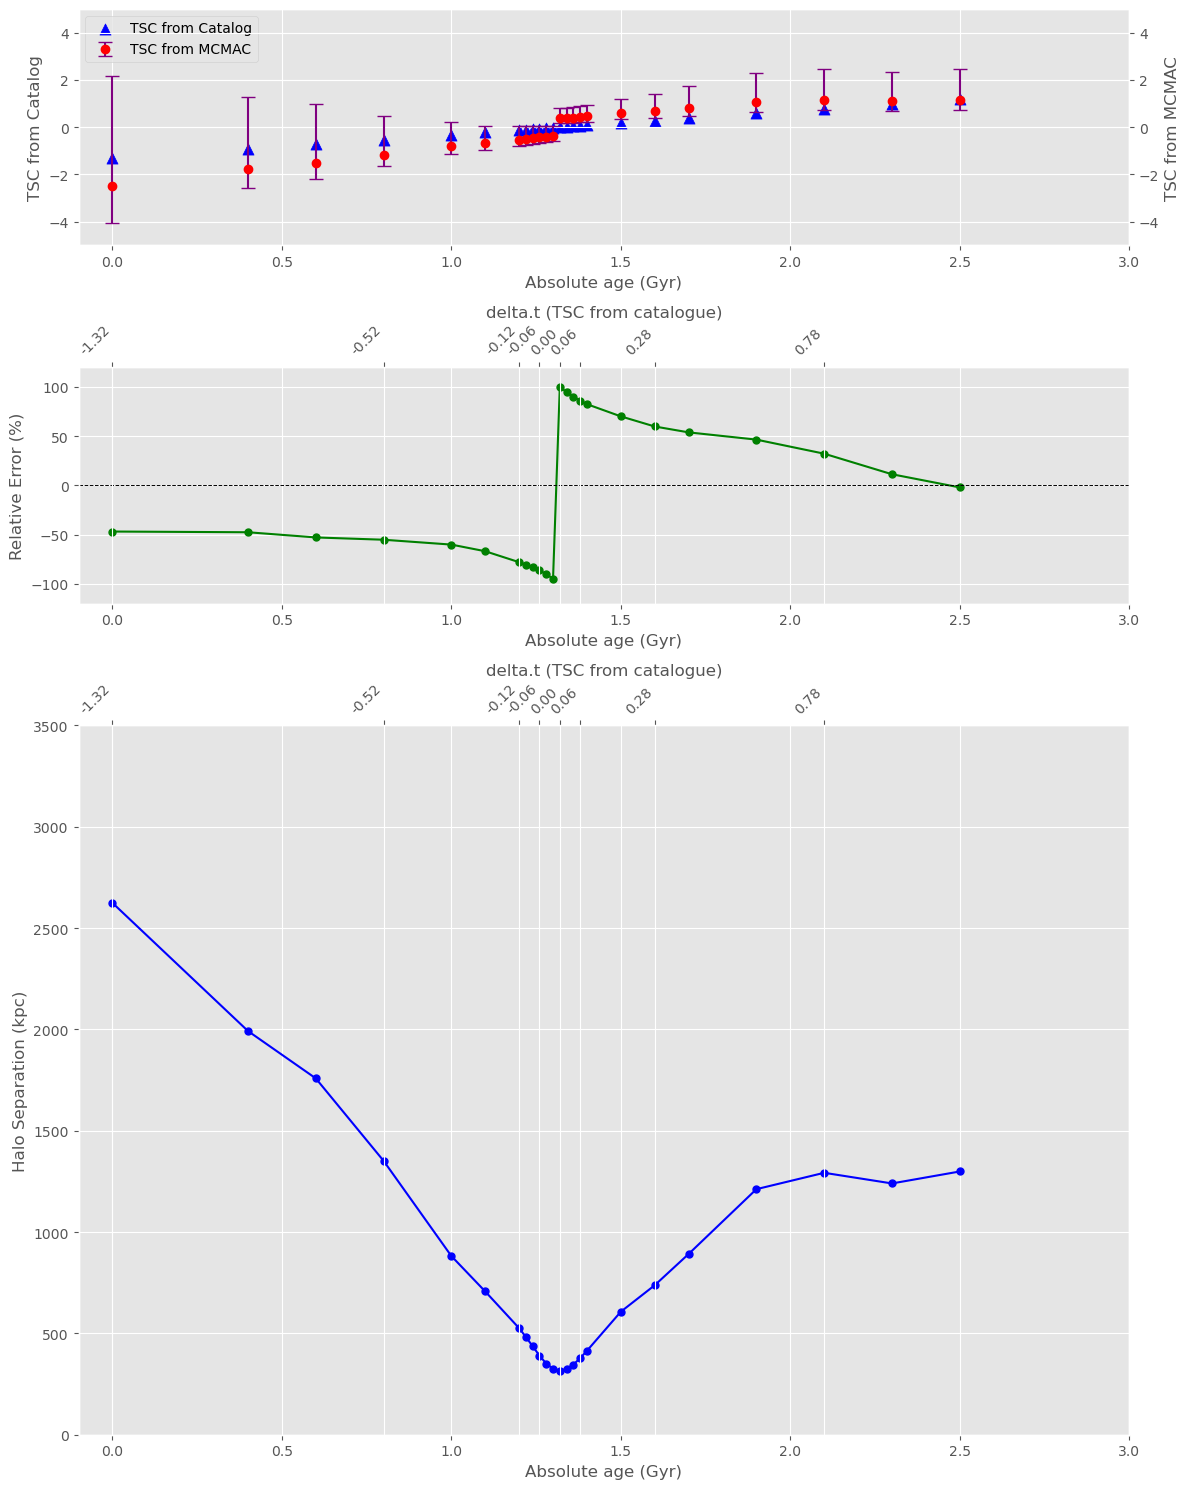

In [91]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# 相対誤差の計算
df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 15))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 3])

# 上部プロット
ax1 = fig.add_subplot(gs[0])
# 青い点を三角形に変更
line1 = ax1.scatter(df_selected['age'], df_selected['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')  # markersize=8 equivalent to s=64 in scatter
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(-0.1, 3)
ax1.set_ylim(-5, 5)

# 第二のy軸としてTSC from MCMACを追加
ax2 = ax1.twinx()
# 赤いデータセットのシンボルを丸ではなく三角形に変更
line2 = ax2.errorbar(df_selected['age'], df_selected['TSC0'], yerr=[np.abs(df_selected['TSC0'] - df_selected['TSC0.lower']), np.abs(df_selected['TSC0.upper'] - df_selected['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

# 凡例を追加
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[1])
ax3.plot(df_selected['age'], df_selected['Relative Error'], 'g-', label='Relative Error', marker='o', markersize=5)
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Relative Error (%)')
ax3.set_xlim(-0.1, 3)
ax3.set_ylim(-120, 120)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected['age'][::3])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::3]
ax6.set_xticklabels(relative_time_labels, rotation=45, ha='right')
ax6.set_xlabel('delta.t (TSC from catalogue)')

# 下部プロット
ax4 = fig.add_subplot(gs[2])
ax4.plot(df_selected['age'], df_selected['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(-0.1, 3)
ax4.set_ylim(0, 3500)

# 第二のx軸としてRelative timeを追加
ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected['age'][::3])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::3]
ax5.set_xticklabels(relative_time_labels, rotation=45, ha='right')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()


## Mass ratio 1:10 b=0kpc

In [92]:
import pandas as pd

filename = '../output0711/zh_1to10_b0_z_MCMAC.txt'

df = pd.read_csv(filename, sep='\t')
df_selected = df[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected.loc[df_selected['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

display(df_selected.head())

,age,sep.kpc,merger,TSC_Catalog,TSC0,TSC0.lower,TSC0.upper
0,0.0,2271.333829,pre,-1.04,-2.222760,-1.014687,-6.343076
1,0.4,1831.557505,pre,-0.64,-1.697030,-0.900540,-4.692522
2,0.6,1414.548949,pre,-0.44,-1.282492,-0.726323,-3.268983
3,0.8,835.495384,pre,-0.24,-0.775857,-0.444453,-1.747695
4,1.0,137.315846,pre,-0.04,-0.193175,-0.085874,-0.471567


/tmp/ipykernel_3706298/2178996770.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100


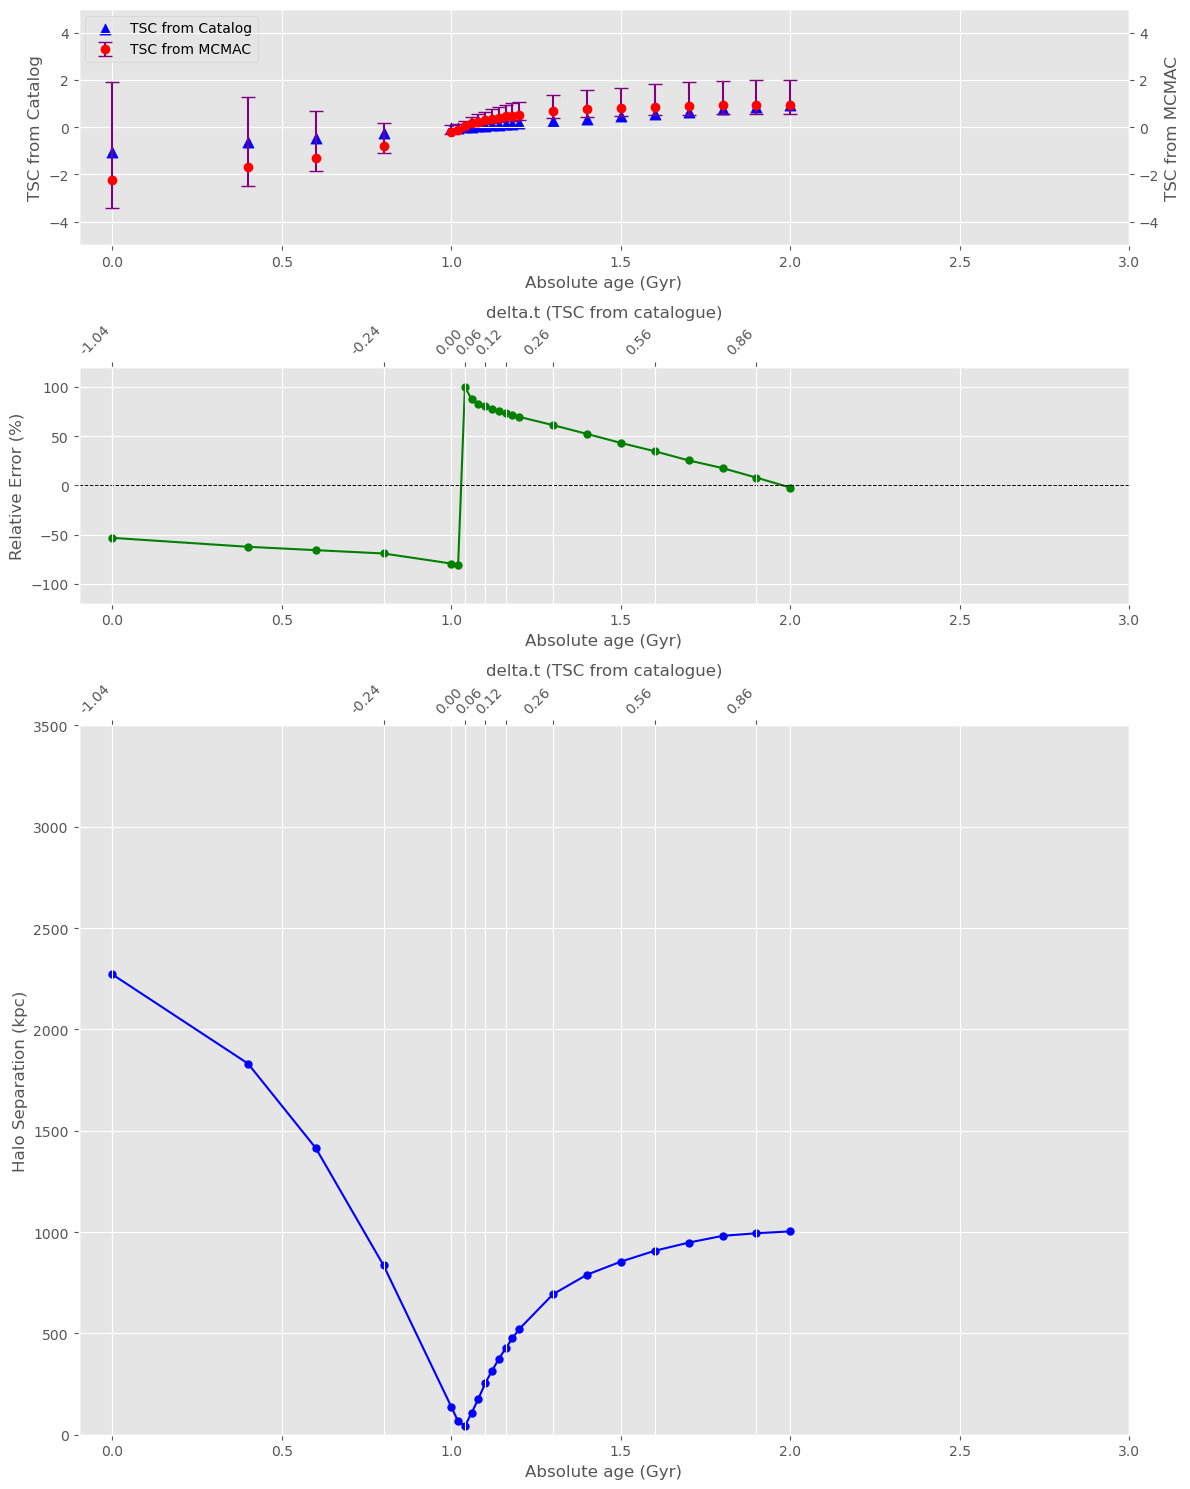

In [93]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# 相対誤差の計算
df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 15))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 3])

# 上部プロット
ax1 = fig.add_subplot(gs[0])
# 青い点を三角形に変更
line1 = ax1.scatter(df_selected['age'], df_selected['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')  # markersize=8 equivalent to s=64 in scatter
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(-0.1, 3)
ax1.set_ylim(-5, 5)

# 第二のy軸としてTSC from MCMACを追加
ax2 = ax1.twinx()
# 赤いデータセットのシンボルを丸ではなく三角形に変更
line2 = ax2.errorbar(df_selected['age'], df_selected['TSC0'], yerr=[np.abs(df_selected['TSC0'] - df_selected['TSC0.lower']), np.abs(df_selected['TSC0.upper'] - df_selected['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

# 凡例を追加
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[1])
ax3.plot(df_selected['age'], df_selected['Relative Error'], 'g-', label='Relative Error', marker='o', markersize=5)
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Relative Error (%)')
ax3.set_xlim(-0.1, 3)
ax3.set_ylim(-120, 120)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected['age'][::3])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::3]
ax6.set_xticklabels(relative_time_labels, rotation=45, ha='right')
ax6.set_xlabel('delta.t (TSC from catalogue)')

# 下部プロット
ax4 = fig.add_subplot(gs[2])
ax4.plot(df_selected['age'], df_selected['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(-0.1, 3)
ax4.set_ylim(0, 3500)

# 第二のx軸としてRelative timeを追加
ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected['age'][::3])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::3]
ax5.set_xticklabels(relative_time_labels, rotation=45, ha='right')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()


## Mass ratio 1:10 b=500kpc

In [94]:
import pandas as pd

filename = '../output0711/zh_1to10_b0.5_z_MCMAC.txt'

df = pd.read_csv(filename, sep='\t')
df_selected = df[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected.loc[df_selected['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

display(df_selected.head())

,age,sep.kpc,merger,TSC_Catalog,TSC0,TSC0.lower,TSC0.upper
0,0.0,2273.186616,pre,-1.04,-2.224415,-1.014400,-6.350524
1,0.4,1745.740873,pre,-0.64,-1.600041,-0.866171,-4.391305
2,0.6,1255.654308,pre,-0.44,-1.137394,-0.645574,-2.819548
3,0.8,818.283871,pre,-0.24,-0.760599,-0.432769,-1.717376
4,1.0,389.992165,pre,-0.04,-0.422205,-0.219298,-0.891862


/tmp/ipykernel_3706298/2178996770.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100


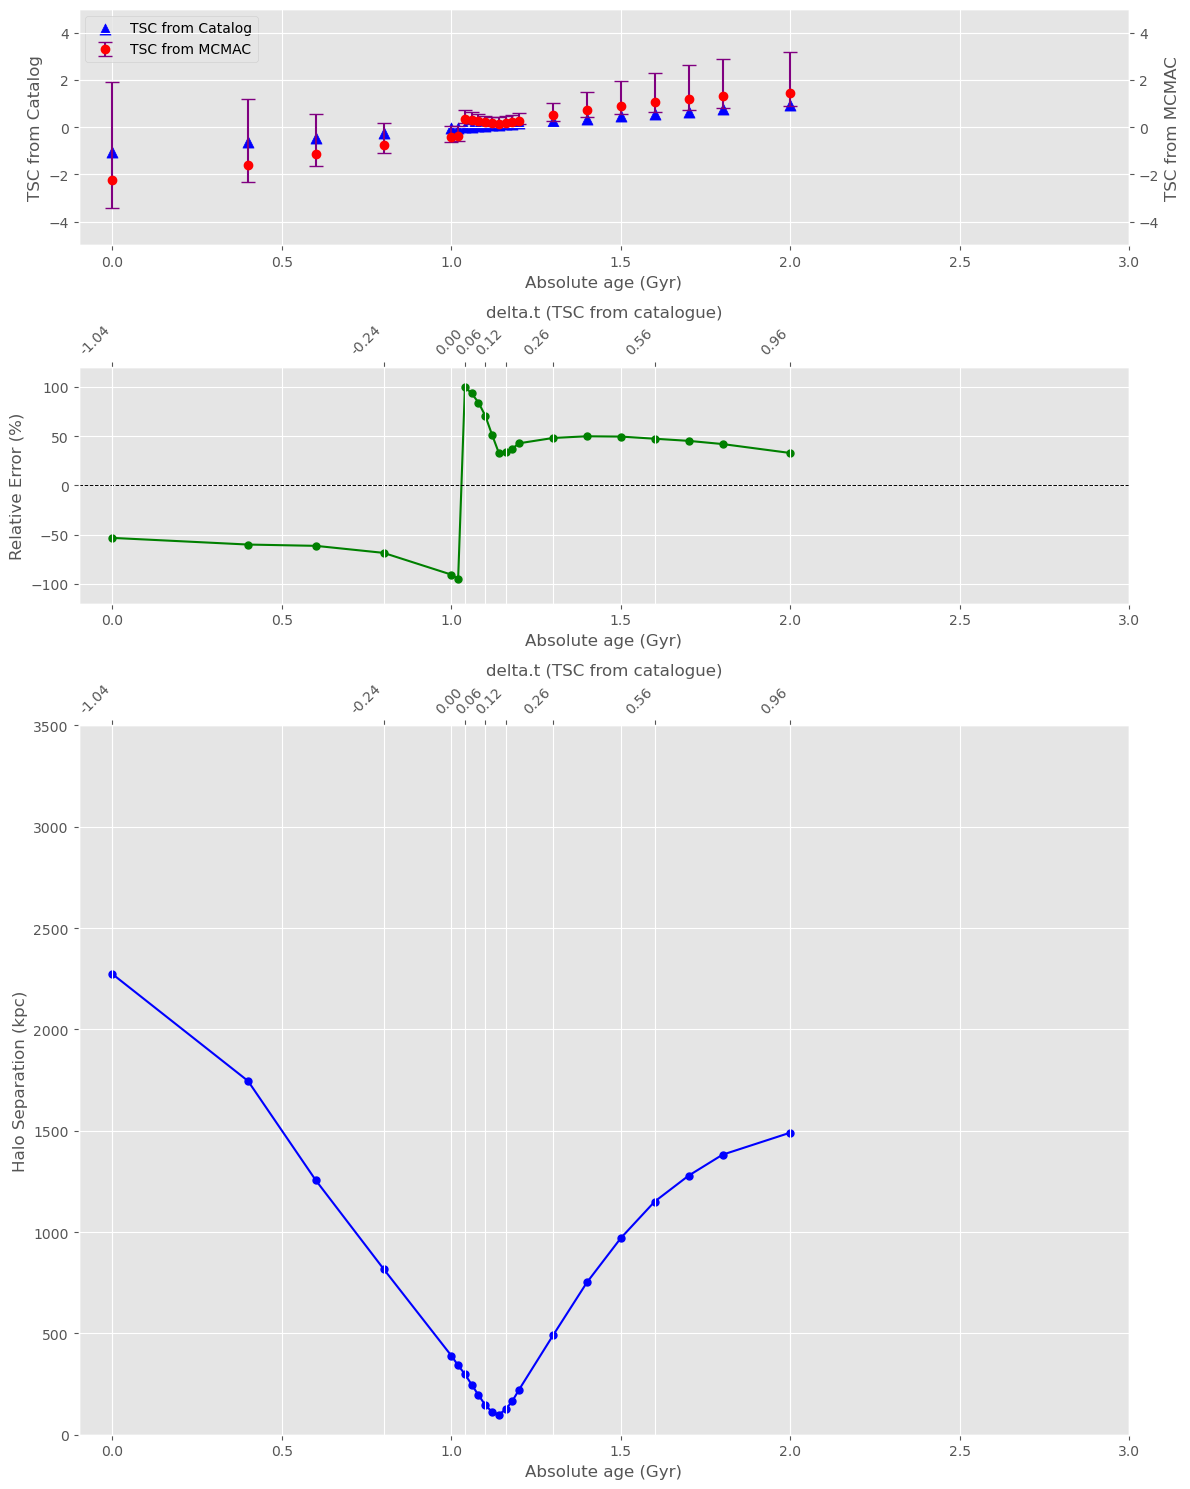

In [95]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# 相対誤差の計算
df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 15))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 3])

# 上部プロット
ax1 = fig.add_subplot(gs[0])
# 青い点を三角形に変更
line1 = ax1.scatter(df_selected['age'], df_selected['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')  # markersize=8 equivalent to s=64 in scatter
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(-0.1, 3)
ax1.set_ylim(-5, 5)

# 第二のy軸としてTSC from MCMACを追加
ax2 = ax1.twinx()
# 赤いデータセットのシンボルを丸ではなく三角形に変更
line2 = ax2.errorbar(df_selected['age'], df_selected['TSC0'], yerr=[np.abs(df_selected['TSC0'] - df_selected['TSC0.lower']), np.abs(df_selected['TSC0.upper'] - df_selected['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

# 凡例を追加
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[1])
ax3.plot(df_selected['age'], df_selected['Relative Error'], 'g-', label='Relative Error', marker='o', markersize=5)
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Relative Error (%)')
ax3.set_xlim(-0.1, 3)
ax3.set_ylim(-120, 120)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected['age'][::3])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::3]
ax6.set_xticklabels(relative_time_labels, rotation=45, ha='right')
ax6.set_xlabel('delta.t (TSC from catalogue)')

# 下部プロット
ax4 = fig.add_subplot(gs[2])
ax4.plot(df_selected['age'], df_selected['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(-0.1, 3)
ax4.set_ylim(0, 3500)

# 第二のx軸としてRelative timeを追加
ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected['age'][::3])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::3]
ax5.set_xticklabels(relative_time_labels, rotation=45, ha='right')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()


## Mass ratio 1:10 b=1000kpc

In [96]:
import pandas as pd

filename = '../output0711/zh_1to10_b1_z_MCMAC.txt'

df = pd.read_csv(filename, sep='\t')
df_selected = df[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected.loc[df_selected['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

display(df_selected.head())

,age,sep.kpc,merger,TSC_Catalog,TSC0,TSC0.lower,TSC0.upper
0,0.0,2265.884062,pre,-1.24,-2.220570,-1.011713,-6.321186
1,0.4,1797.732011,pre,-0.84,-1.657581,-0.884858,-4.583023
2,0.6,1335.696274,pre,-0.64,-1.212932,-0.694440,-3.026108
3,0.8,935.539414,pre,-0.44,-0.845385,-0.489636,-1.980397
4,1.0,634.535557,pre,-0.24,-0.607700,-0.341728,-1.347610


/tmp/ipykernel_3706298/2327009826.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100


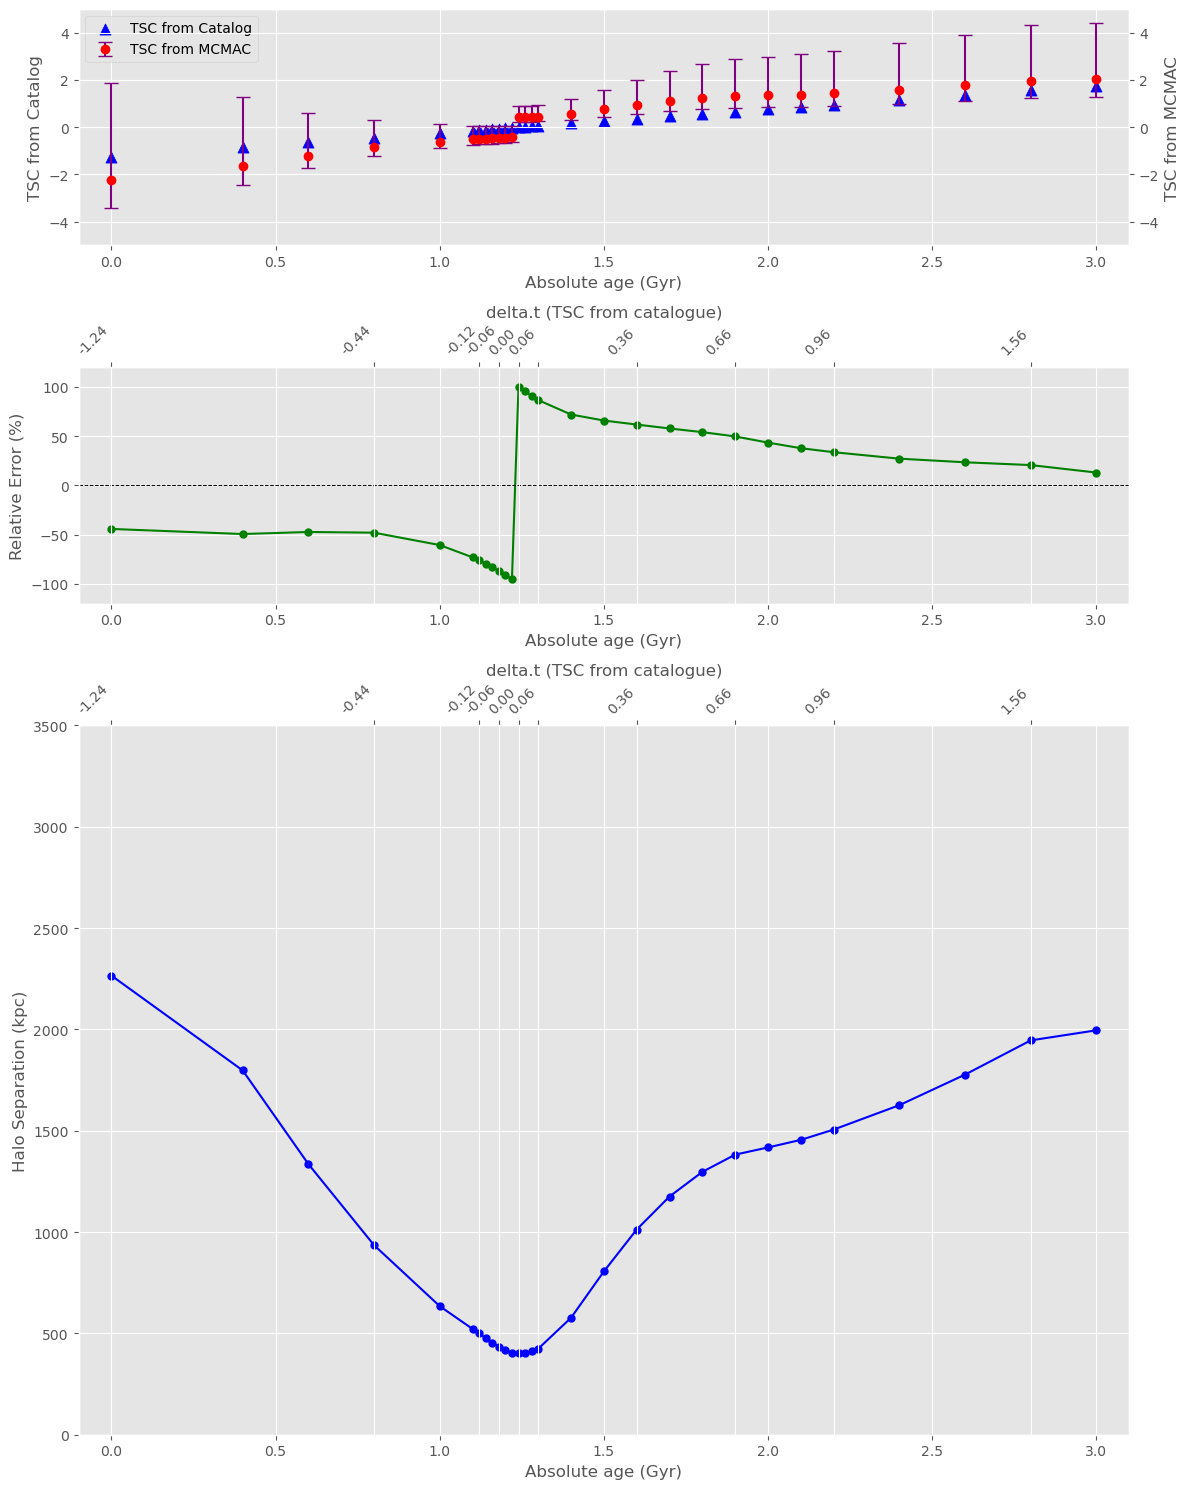

In [97]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# 相対誤差の計算
df_selected.loc[:, 'Relative Error'] = ((df_selected['TSC0'] - (df_selected['TSC_Catalog'])) / abs(df['TSC0'])) * 100

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 15))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 3])

# 上部プロット
ax1 = fig.add_subplot(gs[0])
# 青い点を三角形に変更
line1 = ax1.scatter(df_selected['age'], df_selected['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')  # markersize=8 equivalent to s=64 in scatter
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(-0.1, 3.1)
ax1.set_ylim(-5, 5)

# 第二のy軸としてTSC from MCMACを追加
ax2 = ax1.twinx()
# 赤いデータセットのシンボルを丸ではなく三角形に変更
line2 = ax2.errorbar(df_selected['age'], df_selected['TSC0'], yerr=[np.abs(df_selected['TSC0'] - df_selected['TSC0.lower']), np.abs(df_selected['TSC0.upper'] - df_selected['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

# 凡例を追加
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[1])
ax3.plot(df_selected['age'], df_selected['Relative Error'], 'g-', label='Relative Error', marker='o', markersize=5)
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Relative Error (%)')
ax3.set_xlim(-0.1, 3.1)
ax3.set_ylim(-120, 120)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected['age'][::3])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::3]
ax6.set_xticklabels(relative_time_labels, rotation=45, ha='right')
ax6.set_xlabel('delta.t (TSC from catalogue)')

# 下部プロット
ax4 = fig.add_subplot(gs[2])
ax4.plot(df_selected['age'], df_selected['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(-0.1, 3.1)
ax4.set_ylim(0, 3500)

# 第二のx軸としてRelative timeを追加
ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected['age'][::3])  # Display fewer ticks for better readability
relative_time_labels = [f'{val:.2f}' for val in df_selected['TSC_Catalog'].reindex(df_selected.index, fill_value=0)][::3]
ax5.set_xticklabels(relative_time_labels, rotation=45, ha='right')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()
